In [70]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style for better looking plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12

In [71]:
# Load training logs from all experiments
base_path = Path(r"E:\Python\DLCV\Project DLCV\outputs_feature_derain")

experiments = {
    "Clean 20% / Rain 80%": "coco-rain_0.2",
    "Clean 30% / Rain 70% ": "coco-rain_0.3",
    "Clean 50% / Rain 50%": "coco-rain_0.5",
    # "Low LR (Clean 30%)": "low_lr"
}

logs = {}
for name, folder in experiments.items():
    log_path = base_path / folder / "training_log.json"
    if log_path.exists():
        with open(log_path, 'r') as f:
            logs[name] = json.load(f)
        print(f"✓ Loaded: {name}")
    else:
        print(f"✗ Not found: {name}")

print(f"\nTotal experiments loaded: {len(logs)}")

✓ Loaded: Clean 20% / Rain 80%
✓ Loaded: Clean 30% / Rain 70% 
✓ Loaded: Clean 50% / Rain 50%

Total experiments loaded: 3


In [72]:
# Display configuration summary
print("="*70)
print("EXPERIMENT CONFIGURATIONS")
print("="*70)

for name, log in logs.items():
    config = log.get('config', {})
    print(f"\n{name}:")
    print(f"  - Dataset %: {config.get('percent_dataset', 'N/A')}%")
    print(f"  - Phase 1 Epochs: {config.get('phase1_epochs', 'N/A')}")
    print(f"  - Phase 2 Epochs: {config.get('phase2_epochs', 'N/A')}")
    print(f"  - Batch Size: {config.get('batch_size', 'N/A')}")
    print(f"  - Best Val Loss: {log.get('best_val_loss', 'N/A'):.4f}")
    print(f"  - Total Time: {log.get('total_time', 0)/3600:.2f} hours")

EXPERIMENT CONFIGURATIONS

Clean 20% / Rain 80%:
  - Dataset %: 20%
  - Phase 1 Epochs: 5
  - Phase 2 Epochs: 10
  - Batch Size: 16
  - Best Val Loss: 6.8689
  - Total Time: 1.73 hours

Clean 30% / Rain 70% :
  - Dataset %: 20%
  - Phase 1 Epochs: 5
  - Phase 2 Epochs: 10
  - Batch Size: 16
  - Best Val Loss: 6.7513
  - Total Time: 1.74 hours

Clean 50% / Rain 50%:
  - Dataset %: 20%
  - Phase 1 Epochs: 5
  - Phase 2 Epochs: 10
  - Batch Size: 16
  - Best Val Loss: 6.4938
  - Total Time: 1.85 hours


## Phase 1: De-rain Module Training (Frozen RT-DETR)

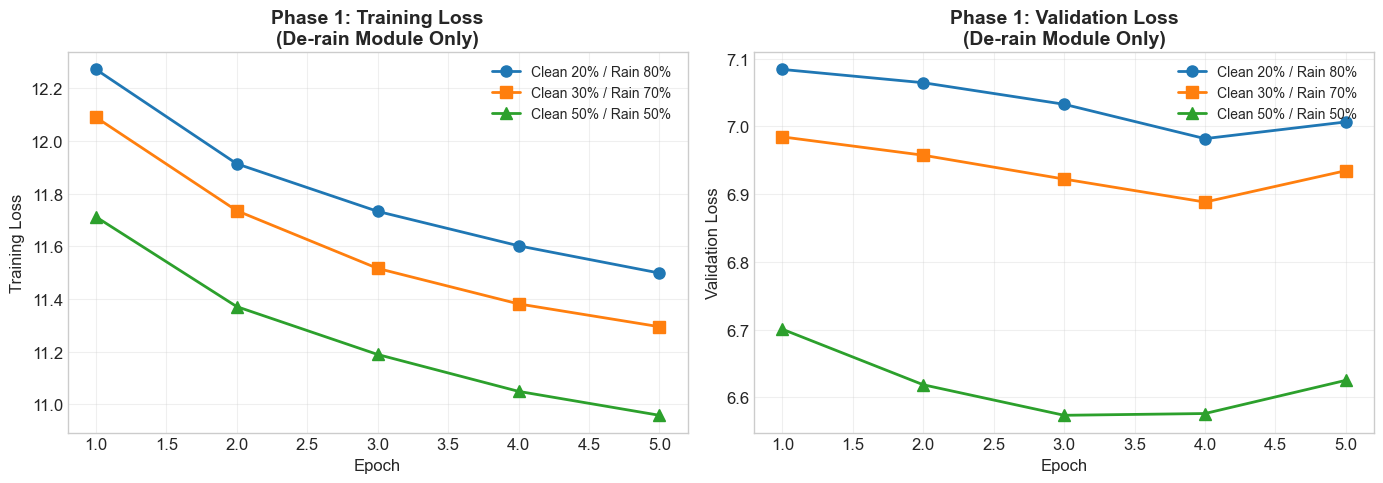

Saved: outputs_feature_derain/phase1_loss_comparison.png


In [73]:
# Plot Phase 1 losses
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# Training Loss - Phase 1
ax1 = axes[0]
for i, (name, log) in enumerate(logs.items()):
    phase1 = log.get('phase1', [])
    epochs = [entry['epoch'] for entry in phase1]
    train_loss = [entry['train_loss'] for entry in phase1]
    ax1.plot(epochs, train_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=8, label=name)

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Phase 1: Training Loss\n(De-rain Module Only)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Validation Loss - Phase 1
ax2 = axes[1]
for i, (name, log) in enumerate(logs.items()):
    phase1 = log.get('phase1', [])
    epochs = [entry['epoch'] for entry in phase1]
    val_loss = [entry['val_loss'] for entry in phase1]
    ax2.plot(epochs, val_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=8, label=name)

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Validation Loss', fontsize=12)
ax2.set_title('Phase 1: Validation Loss\n(De-rain Module Only)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs_feature_derain/phase1_loss_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: outputs_feature_derain/phase1_loss_comparison.png")

## Phase 2: Joint Fine-tuning (De-rain + RT-DETR)

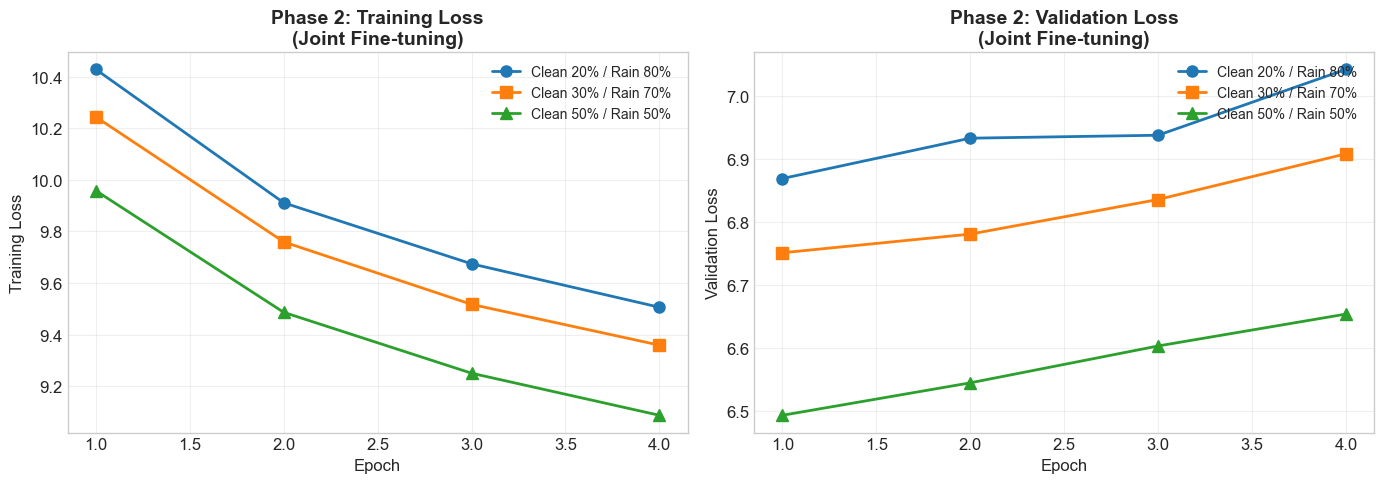

Saved: outputs_feature_derain/phase2_loss_comparison.png


In [74]:
# Plot Phase 2 losses
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Loss - Phase 2
ax1 = axes[0]
for i, (name, log) in enumerate(logs.items()):
    phase2 = log.get('phase2', [])
    epochs = [entry['epoch'] for entry in phase2]
    train_loss = [entry['train_loss'] for entry in phase2]
    ax1.plot(epochs, train_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=8, label=name)

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Phase 2: Training Loss\n(Joint Fine-tuning)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Validation Loss - Phase 2
ax2 = axes[1]
for i, (name, log) in enumerate(logs.items()):
    phase2 = log.get('phase2', [])
    epochs = [entry['epoch'] for entry in phase2]
    val_loss = [entry['val_loss'] for entry in phase2]
    ax2.plot(epochs, val_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=8, label=name)

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Validation Loss', fontsize=12)
ax2.set_title('Phase 2: Validation Loss\n(Joint Fine-tuning)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs_feature_derain/phase2_loss_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: outputs_feature_derain/phase2_loss_comparison.png")

## Combined View: Full Training Process

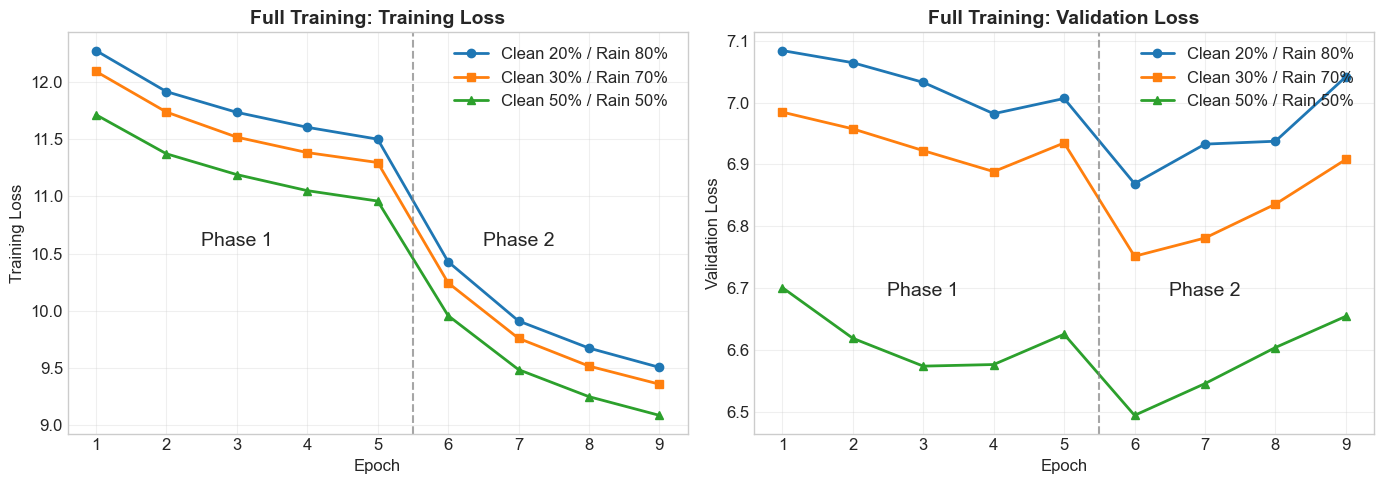

Saved: outputs_feature_derain/full_training_loss_comparison.png


In [80]:
# Plot combined training process (Phase 1 + Phase 2)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Loss - Combined
ax1 = axes[0]
for i, (name, log) in enumerate(logs.items()):
    phase1 = log.get('phase1', [])
    phase2 = log.get('phase2', [])
    
    # Combine epochs (Phase 2 continues from Phase 1)
    epochs_p1 = [entry['epoch'] for entry in phase1]
    epochs_p2 = [entry['epoch'] + len(phase1) for entry in phase2]
    all_epochs = epochs_p1 + epochs_p2
    
    train_loss_p1 = [entry['train_loss'] for entry in phase1]
    train_loss_p2 = [entry['train_loss'] for entry in phase2]
    all_train_loss = train_loss_p1 + train_loss_p2
    
    ax1.plot(all_epochs, all_train_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=6, label=name)

# Add vertical line to separate phases
ax1.axvline(x=5.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.text(3, ax1.get_ylim()[1]*0.85, 'Phase 1', fontsize=14, ha='center')
ax1.text(7, ax1.get_ylim()[1]*0.85, 'Phase 2', fontsize=14, ha='center')

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Full Training: Training Loss', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(True, alpha=0.3)

# Validation Loss - Combined
ax2 = axes[1]
for i, (name, log) in enumerate(logs.items()):
    phase1 = log.get('phase1', [])
    phase2 = log.get('phase2', [])
    
    epochs_p1 = [entry['epoch'] for entry in phase1]
    epochs_p2 = [entry['epoch'] + len(phase1) for entry in phase2]
    all_epochs = epochs_p1 + epochs_p2
    
    val_loss_p1 = [entry['val_loss'] for entry in phase1]
    val_loss_p2 = [entry['val_loss'] for entry in phase2]
    all_val_loss = val_loss_p1 + val_loss_p2
    
    ax2.plot(all_epochs, all_val_loss, marker=markers[i], color=colors[i], 
             linewidth=2, markersize=6, label=name)

# Add vertical line to separate phases
ax2.axvline(x=5.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.text(3, ax2.get_ylim()[1]*0.94, 'Phase 1', fontsize=14, ha='center')
ax2.text(7, ax2.get_ylim()[1]*0.94, 'Phase 2', fontsize=14, ha='center')

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Validation Loss', fontsize=12)
ax2.set_title('Full Training: Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs_feature_derain/full_training_loss_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: outputs_feature_derain/full_training_loss_comparison.png")

## Best Validation Loss Comparison

C:\Users\Mechatronics Lab\AppData\Local\Temp\ipykernel_7892\2437502363.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=15, ha='right', fontsize=10)


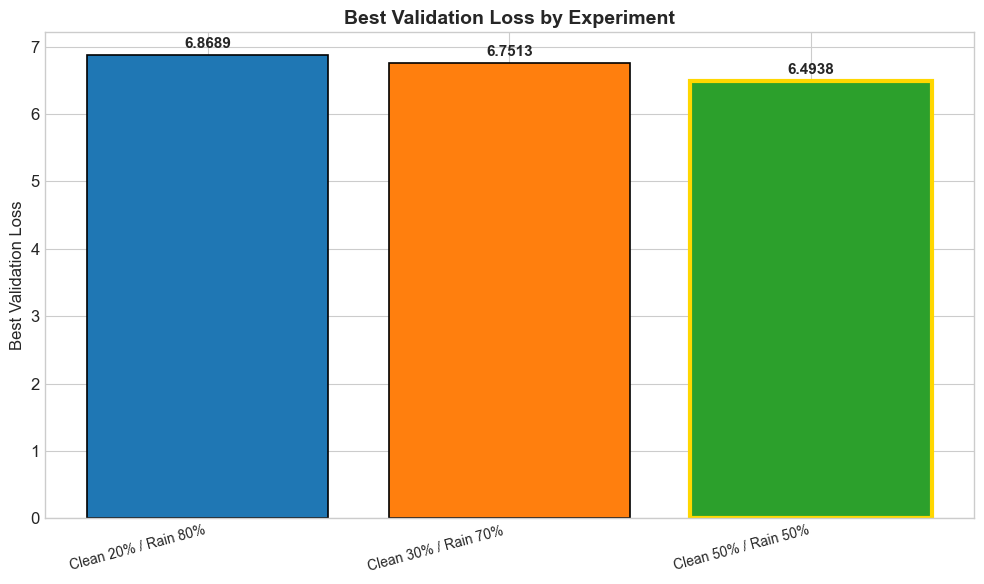


★ Best configuration: Clean 50% / Rain 50% with val_loss = 6.4938
Saved: outputs_feature_derain/best_val_loss_comparison.png


In [76]:
# Bar chart of best validation losses
fig, ax = plt.subplots(figsize=(10, 6))

names = list(logs.keys())
best_losses = [log.get('best_val_loss', 0) for log in logs.values()]

bars = ax.bar(names, best_losses, color=colors[:len(names)], edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, loss in zip(bars, best_losses):
    height = bar.get_height()
    ax.annotate(f'{loss:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Best Validation Loss', fontsize=12)
ax.set_title('Best Validation Loss by Experiment', fontsize=14, fontweight='bold')
ax.set_xticklabels(names, rotation=15, ha='right', fontsize=10)

# Highlight the best one
best_idx = np.argmin(best_losses)
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.savefig('outputs_feature_derain/best_val_loss_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"\n★ Best configuration: {names[best_idx]} with val_loss = {best_losses[best_idx]:.4f}")
print("Saved: outputs_feature_derain/best_val_loss_comparison.png")

## Training Time Comparison

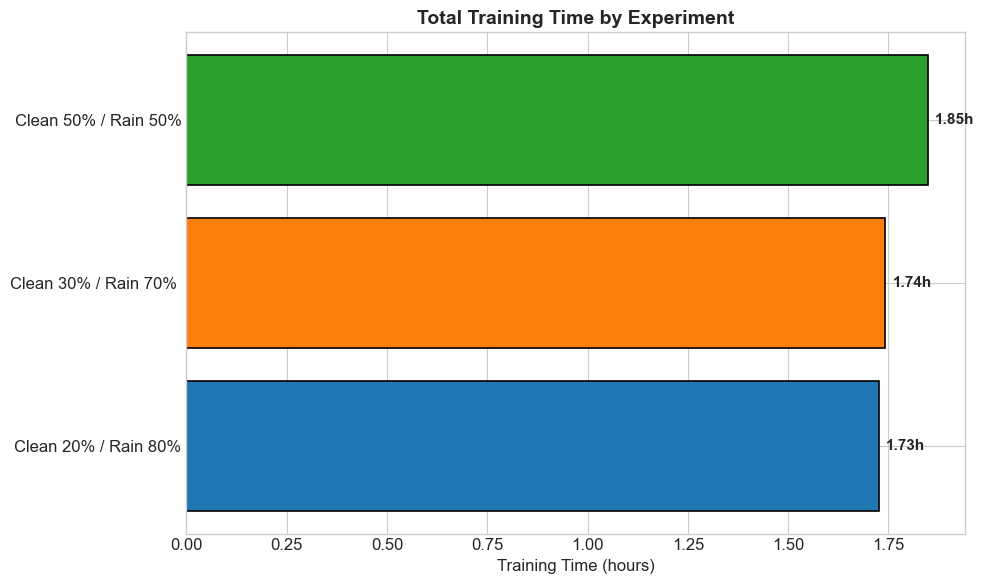

Saved: outputs_feature_derain/training_time_comparison.png


In [77]:
# Training time comparison
fig, ax = plt.subplots(figsize=(10, 6))

names = list(logs.keys())
total_times_hours = [log.get('total_time', 0) / 3600 for log in logs.values()]

bars = ax.barh(names, total_times_hours, color=colors[:len(names)], edgecolor='black', linewidth=1.2)

# Add value labels
for bar, time_h in zip(bars, total_times_hours):
    width = bar.get_width()
    ax.annotate(f'{time_h:.2f}h',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Training Time (hours)', fontsize=12)
ax.set_title('Total Training Time by Experiment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs_feature_derain/training_time_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: outputs_feature_derain/training_time_comparison.png")

## Summary Table

In [78]:
import pandas as pd

# Create summary dataframe
summary_data = []
for name, log in logs.items():
    config = log.get('config', {})
    phase1 = log.get('phase1', [])
    phase2 = log.get('phase2', [])
    
    # Get min val loss from each phase
    min_p1_val = min([e['val_loss'] for e in phase1]) if phase1 else None
    min_p2_val = min([e['val_loss'] for e in phase2]) if phase2 else None
    
    summary_data.append({
        'Experiment': name,
        'Dataset %': config.get('percent_dataset', 'N/A'),
        'P1 Epochs': len(phase1),
        'P2 Epochs': len(phase2),
        'P1 Min Val Loss': f"{min_p1_val:.4f}" if min_p1_val else 'N/A',
        'P2 Min Val Loss': f"{min_p2_val:.4f}" if min_p2_val else 'N/A',
        'Best Val Loss': f"{log.get('best_val_loss', 0):.4f}",
        'Training Time': f"{log.get('total_time', 0)/3600:.2f}h"
    })

df = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("TRAINING SUMMARY")
print("="*100)
display(df)


TRAINING SUMMARY


,Experiment,Dataset %,P1 Epochs,P2 Epochs,P1 Min Val Loss,P2 Min Val Loss,Best Val Loss,Training Time
0,Clean 20% / Rain 80%,20,5,4,6.9820,6.8689,6.8689,1.73h
1,Clean 30% / Rain 70%,20,5,4,6.8883,6.7513,6.7513,1.74h
2,Clean 50% / Rain 50%,20,5,4,6.5735,6.4938,6.4938,1.85h


## Key Observations

Based on the training curves:

1. **COCO 50% / Rain 50%** achieves the **lowest validation loss** (6.49), suggesting balanced data helps generalization.

2. **Phase 1 → Phase 2 Transition**: All experiments show a drop in training loss when transitioning to joint fine-tuning, indicating the detector backbone benefits from adaptation.

3. **Overfitting in Phase 2**: Some configurations (especially COCO 30% Full Dataset) show increasing validation loss in Phase 2, suggesting overfitting with longer training.

4. **Training Efficiency**: 20% dataset experiments train ~4x faster than full dataset, with competitive results.